<a href="https://colab.research.google.com/github/Saaanu/DataScience/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (30 Points)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at 

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [9]:
#Q1.1
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv')
    # Standardizing the features
print(df)
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(df)
X=pd.DataFrame(X)
X.columns=df.columns

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

     V1   V2   V3   V4   V5   V6
0   7.0  3.0  6.0  4.0  2.0  4.0
1   1.0  3.0  2.0  4.0  5.0  4.0
2   6.0  2.0  7.0  4.0  1.0  3.0
3   4.0  5.0  4.0  6.0  6.0  5.0
4   1.0  2.0  2.0  3.0  2.0  2.0
5   6.0  3.0  6.0  4.0  4.0  4.0
6   5.0  3.0  6.0  3.0  1.0  3.0
7   6.0  4.0  7.0  4.0  6.0  4.0
8   3.0  4.0  2.0  3.0  7.0  3.0
9   2.0  6.0  2.0  6.0  2.0  6.0
10  6.0  4.0  7.0  3.0  5.0  3.0
11  2.0  3.0  1.0  4.0  1.0  4.0
12  7.0  2.0  6.0  4.0  3.0  3.0
13  4.0  6.0  4.0  5.0  6.0  6.0
14  1.0  3.0  2.0  2.0  3.0  4.0
15  6.0  4.0  6.0  3.0  3.0  4.0
16  5.0  3.0  6.0  3.0  1.0  4.0
17  7.0  3.0  7.0  4.0  6.0  4.0
18  2.0  4.0  3.0  3.0  6.0  3.0
19  3.0  5.0  3.0  6.0  4.0  6.0
20  1.0  3.0  2.0  3.0  5.0  3.0
21  5.0  4.0  5.0  4.0  2.0  4.0
22  2.0  2.0  1.0  5.0  4.0  4.0
23  4.0  6.0  4.0  6.0  4.0  7.0
24  6.0  5.0  4.0  2.0  1.0  4.0
25  3.0  5.0  4.0  6.0  4.0  7.0
26  4.0  4.0  7.0  2.0  2.0  5.0
27  3.0  7.0  2.0  6.0  4.0  3.0
28  4.0  6.0  3.0  7.0  2.0  7.0
29  2.0  3

array([0.39747021, 0.30295205, 0.16145572, 0.07131525, 0.05138315,
       0.01542362])

#Q1.2
#Based on the variables, our benchmark is 1/6 = 0.16666667. There are 2 factors extracted from the data for principal component analysis.
#0.39747021 + 0.30295205 = 0.70042226



 PCA :

[[-0.30018046 -0.6143442 ]
 [ 0.50371538 -0.26353415]
 [-0.36363296 -0.57076551]
 [ 0.52621504 -0.21051407]
 [ 0.15821829  0.19532841]
 [ 0.47116694 -0.380642  ]]


 Unrotated FA :

[[ 0.91639593  0.1231473 ]
 [-0.16959833  0.74233622]
 [ 0.9493102   0.0174767 ]
 [-0.24348583  0.75021151]
 [-0.18118035  0.0286029 ]
 [-0.06211276  0.82810382]]


 Varimax FA :

[[ 0.92457783  0.01012876]
 [-0.077522    0.75750709]
 [ 0.94431928 -0.09877442]
 [-0.14989135  0.77436118]
 [-0.17632109  0.05055014]
 [ 0.03964755  0.82948297]]


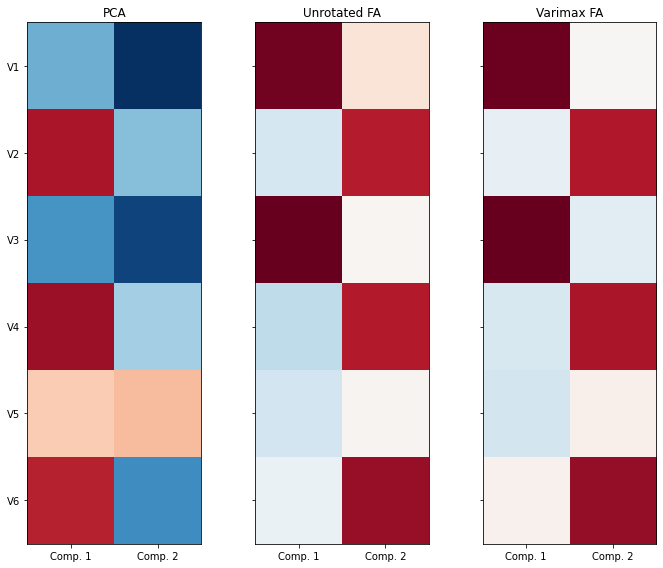

In [16]:
#Q1.3
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(X.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(X.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
plt.tight_layout()
plt.show()


V1 and V3 are included same factor (1st factor) In contrast, V2, V4 and V6 are included same factor (2nd factor)

V1 = preventation of cavities; V2 = shiny teeth; V3 = strong gums; V4 = fresh breath; V5 = prevention of tooth decay; V6 = attractive teeth

In [17]:
#Q2
import pandas as pd
breast_dataset=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Bcancer.csv')
breast_dataset
y=breast_dataset['label']
X=breast_dataset.drop(['label'], axis = 1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Q2) (70 points)Using breast cancer data above, 

(1) split the data two : training (65%) and testing (35%)

(2) Using logistic regression model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(3)Using knn model in train data(choose k based on CV), get the performance metric on test data(accuracy,recall, precision confusuion matrix). What is the k value chosen based on k?

(4)Using naive  model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(5)Using SVM with parameter tuning(you can use optuna) in train data ,get the performance metric on test data(accuracy,recall, precision confusuion matrix)

In [18]:
#Q2.1
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=17
)

In [19]:
#Q2.2
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] 
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.92
Precision: 0.9307692307692308
Recall: 0.9453125


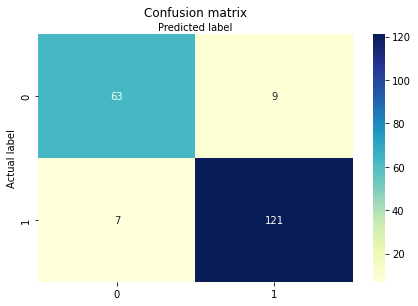

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
eval(y_test,y_pred)

In [21]:
#Q2.3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_params = {"n_neighbors": range(1,20)}

knn_grid = GridSearchCV(knn, knn_params, cv=3)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 6}

Accuracy: 0.935
Precision: 0.9389312977099237
Recall: 0.9609375


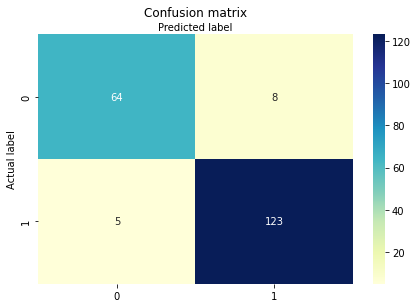

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knncv = KNeighborsClassifier(**knn_grid.best_params_)
knncv.fit(X_train,y_train)
y_predknncv=knncv.predict(X_test)
eval(y_test,y_predknncv)

Accuracy: 0.935
Precision: 0.9457364341085271
Recall: 0.953125


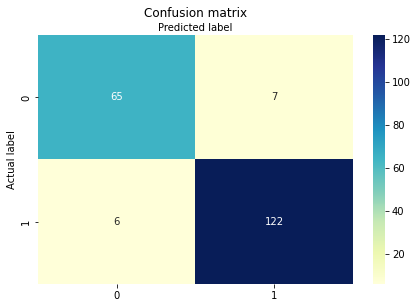

In [23]:
#Q2.4
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_predNB=model.predict(X_test)
eval(y_test,y_predNB)

In [24]:
#Q2.5
!pip install optuna

     |████████████████████████████████| 308 kB 19.0 MB/s 
     |████████████████████████████████| 81 kB 9.4 MB/s 
     |████████████████████████████████| 210 kB 48.6 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 146 kB 24.5 MB/s 
     |████████████████████████████████| 113 kB 53.3 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f815bcedc661aa13589d4d39178dbff5f588d95f85313e515c2114a0c1a25e1c
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [25]:
from sklearn.svm import SVC 
import optuna as op

from sklearn.model_selection import StratifiedKFold, train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, y_train, test_size=0.35, random_state=17
) 
def objective(trial):

   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.1,3.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,degree=degree,gamma=gamma,C=c)
   model.fit(X_train2,y_train2)
   accuracy = model.score(X_test2,y_test2)
   return accuracy
study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=10,n_jobs=-1)
print(study.best_trials)

[I 2022-04-19 19:05:47,208] A new study created in memory with name: no-name-e16b23e0-ebfa-4398-9ebf-a419c65b50de
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  FutureWarning,
[I 2022-04-19 19:05:47,268] Trial 1 finished with value: 0.6461538461538462 and parameters: {'kernel': 'sigmoid', 'C': 0.4012966508405946, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.6461538461538462.
[I 2022-04-19 19:05:47,324] Trial 2 finished with value: 0.6461538461538462 and parameters: {'kernel': 'rbf', 'C': 1.0168689621872435, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.6461538461538462.
[I 2022-04-19 19:05:47,364] Trial 3 finished with value: 0.8846153846153846 and parameters: {'kernel': 'poly', 'C': 0.8056291324055003, 'gamma': 'scale', 'degree': 1}. Best is trial 3 with value: 0.8846153846

[FrozenTrial(number=0, values=[0.9538461538461539], datetime_start=datetime.datetime(2022, 4, 19, 19, 5, 47, 218868), datetime_complete=datetime.datetime(2022, 4, 19, 19, 5, 48, 841015), params={'kernel': 'linear', 'C': 0.9908726205299417, 'gamma': 'auto', 'degree': 2}, distributions={'kernel': CategoricalDistribution(choices=('rbf', 'poly', 'linear', 'sigmoid')), 'C': LogUniformDistribution(high=3.0, low=0.1), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'degree': IntLogUniformDistribution(high=3, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None), FrozenTrial(number=4, values=[0.9538461538461539], datetime_start=datetime.datetime(2022, 4, 19, 19, 5, 47, 373039), datetime_complete=datetime.datetime(2022, 4, 19, 19, 5, 48, 31314), params={'kernel': 'linear', 'C': 1.346581626086521, 'gamma': 'auto', 'degree': 1}, distributions={'kernel': CategoricalDistribution(choices=('rbf', 'poly', 'linear', 'sig

In [26]:
print(study.best_params)

{'kernel': 'linear', 'C': 1.346581626086521, 'gamma': 'auto', 'degree': 1}


Accuracy: 0.945
Precision: 0.9465648854961832
Recall: 0.96875


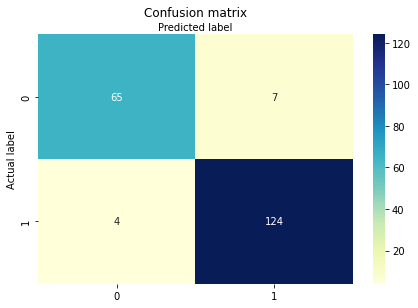

In [27]:
parameters=study.best_params
from sklearn.svm import SVC 
sv =SVC(**parameters)
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)